In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle

In [3]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict = pickle.load(fo,encoding='bytes')
        return dict

In [4]:
data_batch_1 = unpickle('data_batch_1')

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
### datasetimizi yükleyelim

(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 158s 1us/step


In [13]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
X_train


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [16]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

### y_train ve y_test 2 boyutlu bir array olarak tutuluyor cifar10 verisetinde Biz bu verilerigörsel olarak daha rahat anlamak için tek boyutlu hale getiriyoruz 2 boyutlu bir arrayi (sadece tek bir boyutunda veri vaar diğer boyutu boş olan tabi ) tekboyutlu hale getirmek için reshape() kullanıyoruz

In [21]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

##### verilere göz atalım bu amaçla kendimiz bir array oluşturuyoruz:

In [22]:
resim_siniflari =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [35]:
def plot_sample(X,y,index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(resim_siniflari[y[index]])

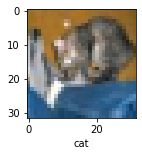

In [36]:
plot_sample(X_test,y_test,0)

#### Normalizasyon 
verilerimizi normalize etmemiz gerek Aksi Takdirde CNN algoritmaları uyanlış sonuç verebiliyor
fotoğraflar rgb olarak 3 kanallı ve her bir pixel 0-255 arasında değer aldığı için basitçe pixel değerini 255 e bölmemizyeterli olacaktır

In [37]:
X_train = X_train/255
X_test =X_test/255

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### Deep Learning Algoritmamızın (CNN - Covolutional Neural Network) Tasarımını Yapıyoruz

In [40]:
deep_learning_model = models.Sequential([
    #ilk bölüm Convolution Layer.. Bu kısımda fotoğraflardan tanıma yapabilmek için özellikleri çıkarıyoruz
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #ikinci bölüm klasik Artifical Neural Network olan Layerimiz.. Yukarıdaki özelliklerimiz ve training bilgilerine 
    #göre ANN modelimizi eğiteceğiz
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')##outputum 10 nöron
    
])

In [41]:
deep_learning_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

### Modelimizi Eğitmeye başlayalım artık :

In [42]:
deep_learning_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4419 - accuracy: 0.4807
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0914 - accuracy: 0.6176
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9614 - accuracy: 0.6640
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8709 - accuracy: 0.6962
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8054 - accuracy: 0.7196


In [43]:
deep_learning_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9392 - accuracy: 0.6788


[0.9392404556274414, 0.6787999868392944]

In [44]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

array([[6.5478608e-02, 5.0022672e-03, 9.2970096e-03, 5.2358013e-01,
        4.6570664e-03, 3.0679899e-01, 5.2434012e-02, 1.4314067e-04,
        2.2775883e-02, 9.8328646e-03],
       [1.5351313e-02, 1.8174592e-01, 2.2896898e-05, 6.4226560e-06,
        4.7490576e-06, 1.2494773e-07, 1.1737709e-07, 2.4838271e-06,
        8.0235112e-01, 5.1488873e-04],
       [7.0673466e-02, 6.3820672e-01, 1.9187290e-03, 5.6825187e-03,
        7.6071401e-03, 1.4066830e-03, 2.9800544e-04, 1.4613915e-03,
        2.1790656e-01, 5.4838780e-02]], dtype=float32)

In [45]:
y_classes =[np.argmax(element) for element in y_pred]
y_classes[:3]

[3, 8, 1]

In [46]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

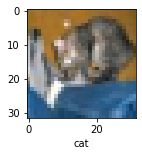

In [49]:
plot_sample(X_test, y_test,0)

In [51]:
resim_siniflari[y_classes[0]]

'cat'

In [52]:
resim_siniflari[y_classes[3]]

'airplane'

In [53]:
y_test[3]

0